In [3]:
!pip install os
os.getcwd()

ERROR: Could not find a version that satisfies the requirement os (from versions: none)


'C:\\Users\\ATHCHAND\\Tensorflow pracs'

ERROR: No matching distribution found for os


In [4]:
import pandas as pd

df=pd.read_csv('movie_data.csv')
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.shape

(7254, 27)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [6]:
import tensorflow 
from tensorflow import keras 
from tqdm import tqdm 

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x=[]

for i in tqdm(range(df.shape[0])):
    path='C:/Users/ATHCHAND/Tensorflow pracs/movie_images/'+df['Id'][i]+'.jpg'
    img=keras.preprocessing.image.load_img(path,target_size=(350,350,3))
    img=keras.preprocessing.image.img_to_array(img)
    img=img/255.
    x.append(img)
    
    
x=np.array(x)

100%|██████████| 7254/7254 [00:44<00:00, 161.74it/s]


In [10]:
x.shape

(7254, 350, 350, 3)

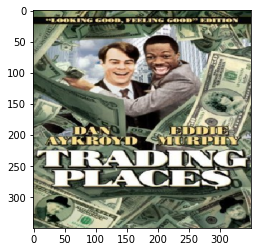

In [17]:
plt.imshow(x[2])

In [18]:
df['Genre'][2]

"['Comedy']"

In [20]:
y=df.drop(['Id','Genre'],axis=1)
y=y.to_numpy()
y.shape

(7254, 25)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Model Building

In [25]:
x_train[0].shape

(350, 350, 3)

In [26]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(25,activation='sigmoid'))  ## remember to give 'sigmoid'

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model_history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
182/182 [==============================] - 345s 2s/step - loss: 0.7071 - accuracy: 0.1137 - val_loss: 1.5159 - val_accuracy: 0.0324
Epoch 2/5
182/182 [==============================] - 282s 2s/step - loss: 0.3210 - accuracy: 0.2463 - val_loss: 0.2565 - val_accuracy: 0.1819
Epoch 3/5
182/182 [==============================] - 303s 2s/step - loss: 0.2639 - accuracy: 0.2900 - val_loss: 0.2387 - val_accuracy: 0.1943
Epoch 4/5
182/182 [==============================] - 312s 2s/step - loss: 0.2526 - accuracy: 0.3104 - val_loss: 0.2417 - val_accuracy: 0.1930
Epoch 5/5
182/182 [==============================] - 341s 2s/step - loss: 0.2468 - accuracy: 0.3088 - val_loss: 0.3023 - val_accuracy: 0.1826


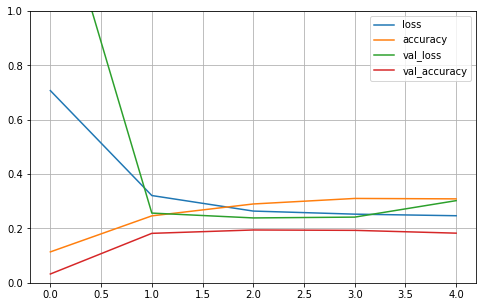

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testing the model 

(350, 350, 3)

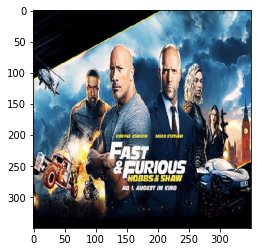

In [34]:
img1=keras.preprocessing.image.load_img('fast.jpg',target_size=(350,350,3))
#plt.imshow(img1)
img1=keras.preprocessing.image.img_to_array(img1)
img1=img1/255.

img1.shape


    


In [35]:
classes=df.columns[2:]
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [38]:
img1=img1.reshape(1,350,350,3)

y_prob=model.predict(img1)
y_prob

array([[0.18132955, 0.17855549, 0.04479107, 0.07702398, 0.32255474,
        0.15818602, 0.20122185, 0.44336244, 0.08677095, 0.06078258,
        0.02605501, 0.05355269, 0.03594625, 0.02128851, 0.09139544,
        0.00394595, 0.00694275, 0.00758556, 0.22421944, 0.07253212,
        0.0056473 , 0.03533071, 0.15554163, 0.01156545, 0.02085307]],
      dtype=float32)

In [52]:
np.argsort(y_prob[0])[-3:]

array([18,  4,  7], dtype=int64)

In [54]:
top3=np.argsort(y_prob[0])[-3:]
top3

array([18,  4,  7], dtype=int64)

In [56]:
top3[0]

18

In [57]:
for i in range(3):
    print(classes[top3[i]])

Romance
Comedy
Drama
